In [10]:
import pandas as pd
from io import BytesIO
!pip install plotly
!pip install mlxtend
from google.datalab import storage
import plotly.plotly as py
import numpy as np
from mlxtend.frequent_patterns import apriori 
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from mlxtend.frequent_patterns import association_rules
import plotly.graph_objs as go
import plotly.graph_objs as go
obj = storage.Bucket('neeh').object('ratings_Electronics.csv')
data_csv=obj.read_stream()
!pip install time
import time
!pip install mlxtend
#len(df.index)

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Could not find a version that satisfies the requirement time (from versions: )
No matching distribution found for time
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
df = pd.read_csv(BytesIO(data_csv), sep = ',',header=None)
df.columns=['userId','itemId','rating','timestamp']
df['timestamp']=df['timestamp'].apply(lambda x:time.strftime('%Y-%m-%d',time.gmtime(x)))

In [ ]:
from __future__ import division

In [ ]:
start_time=time.time()
rules=list()
for i in range(int((len(df.index)/10000)+1)):
  try:
    df2=df.iloc[10000*i:(i+1)*10000,:]
    df3=df2.pivot(index='userId',columns='itemId',values='itemId')
    df4=pd.DataFrame(np.matrix(df3)!=None)
    df4.columns=df3.columns
    frequent_items=apriori(df4,min_support=0.0001,use_colnames=True)
    rules.append(association_rules(frequent_items,metric='lift',min_threshold=1.1).loc[:,['antecedants','consequents','lift']])
    if i%10==0:
      print(rules[i].head())
  except:
    pass
net_time=start_time-time.time()

                antecedants   consequents         lift
0              (9966304932)  (9966286683)  9826.000000
1              (9966286683)  (9966304932)  9826.000000
2              (6000089805)  (6000012217)  1228.250000
3              (6000012217)  (6000089805)  1228.250000
4  (B00000J0GF, B00000J0IX)  (B00000J0IV)   818.833333


In [15]:
rules

[]

In [10]:
apriori(df4,min_support=0.0001,use_colnames=True)

NameError: name 'apriori' is not defined

In [3]:
for i in range(1):
  try:
    print('a')
    df2=df.iloc[10000*i:(i+1)*10000,:]
    print('d')
    df3=df2.pivot(index='userId',columns='itemId',values='itemId')
    print('i')
    k=pd.DataFrame(np.matrix(df3)!=None)
    print('t')
  except:
    pass

a
d
i


In [5]:
import numpy as np
k=pd.DataFrame(np.matrix(df3)!=None)

In [72]:
frequent_items

NameError: name 'frequent_items' is not defined

In [13]:

rules=list()
print('a')
popular_prod=list()
li=list()
for i in range(2):
  df2=df.iloc[3000*i:(i+1)*3000,:]
  df3=df2.pivot(index='userId',columns='itemId',values='itemId')
  ff=pd.DataFrame(df2['itemId']).groupby(['itemId']).apply(lambda x:x.count())
  ff.columns=['counts']
  gg=pd.DataFrame(ff).sort_values(['counts'],ascending=False)
  popular_prod.append(gg.iloc[0:6,:])
  ######collabarative filtering
  df12=df2.pivot(index='userId',columns='itemId',values='rating')
  df12.fillna(value=0,inplace=True)
  similar_users=cosine_similarity(df12)
  np.fill_diagonal(similar_users,0)
  similar_users=pd.DataFrame(similar_users)
  for i in range(len(similar_users)):
    try:
      k=similar_users.loc[i,:].idxmax()
      li.append(k)
    #print(li)
    except:
      li.append(None)
  ind_recom=[None for x in range(len(li)+1)]
  # retrieve item id's of a prticualr user
ratings=list()
user_id=list()
for i in range(len(similar_users)):
  a=list()
  b=list()
  for k in df.loc[df['userId']==df3.index[li[i]],['itemId','userId']].values:
    a.append(k[0])
    user_id.append(k[1])
  for k in df.loc[df['userId']==df3.index[i],'itemId'].values:
    b.append(k)
  #recommending
  net=set(a)-set(b)
  for item in net:
    ratings.append(df.loc[(df['userId']==user_id[0]) & (df['itemId']==item),'rating'].values[:len(net)])
  ind_recom[i]=(df3.index[i],user_id[0],net,ratings)
  
              
  
            
                                                                                      

a


KeyboardInterrupt: 

In [15]:
ind_recom

[('A00766851QZZUBOVF4JFT',
  'A01255851ZO1U93P8RKGE',
  {'9966294791', 'B008KTRLZA', 'B00GWNWDEK'},
  [array([5.]),
   array([5.]),
   array([5.]),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([], dtype=float64),
   array([]

In [105]:
popular_prod=['B006GWO5WK','B0019EHU8G','B007WTAJTO','B00DR0PDNE','B0074BW614']
k=df.loc[df.loc[:,'itemId']==popular_prod[0],['timestamp','rating']]

k['year']=k['timestamp'].apply(lambda x:x[:4])
#k=k.loc[k['year']=='2014',:]
k['month']=k['timestamp'].apply(lambda x:x[5:7])
k=k.groupby(['year','month'])['rating'].mean()
k=k.reset_index(level=['year','month'])
k=k.sort_values(['year','month'])
k['timestamp']=k[['year','month']].apply(lambda x:'-'.join(x),axis=1)
py.sign_in('AdityaRoyalMatturi', 'zMVu0vZEqfMLeMEXdltw')
data5 = go.Scatter(
          x=k['timestamp'],
          y=k['rating'],mode='lines+markers',
line = dict(
        width = .4,
        ))
layout = go.Layout(
    title='Ratings for product id B006GWO5WK from beginning' ,
    xaxis=dict(
        title='time'),
    yaxis=dict(
        title='Rating')
)
#data4 = go.Scatter(
#          x=k['timestamp'],
 #         y=k['rating'],mode='lines+markers')
#data3 = go.Scatter(
 #         x=k['timestamp'],
  #        y=k['rating'],mode='lines+markers')
#data2 = go.Scatter(
 #         x=k['timestamp'],
  #        y=k['rating'],mode='lines+markers')
#data1 = go.Scatter(
 #         x=k['timestamp'],
  #        y=k['rating'],mode='lines+markers')
data=[data5]
fig = dict(data=data)
py.plot(fig)
data=[data5]
fig = dict(data=data,layout=layout)
py.iplot(fig,filename='a.csv')

In [30]:
df.head()

itemid  count(rating)
27089   B00BGA9WK2           7561
36259   B0044YU60M           5239
41007   B007WTAJTO          14172
80183   B00316263Y           5038
110681  B000LRMS66           8715

In [7]:
obj = storage.Bucket('neeh').object('a.csv')
data_csv=obj.read_stream()
df = pd.read_csv(BytesIO(data_csv), sep = ',')
df['count(rating)']=np.log(df['count(rating)'])


In [8]:

#################e##########
py.sign_in('AdityaRoyalMatturi', 'zMVu0vZEqfMLeMEXdltw')
data5 = go.Histogram(
          x=df['count(rating)'],width=4)
layout = go.Layout(
    title='distribution of count of user_ids in log_scale ',
    xaxis=dict(
        title='repetitions in logs'),
    yaxis=dict(
        title='number of user_ids '))
data=[data5]
fig = dict(data=data,layout=layout)
py.iplot(fig,filename='e.csv')


PlotlyDictKeyError: 'width' is not allowed in 'histogram'

Path To Error: ['width']

Valid attributes for 'histogram' at path [] under parents []:

    ['cumulative', 'orientation', 'stream', 'ysrc', 'ycalendar',
    'hoverinfo', 'xsrc', 'visible', 'legendgroup', 'selected', 'marker',
    'uid', 'showlegend', 'error_x', 'error_y', 'customdata', 'hoverinfosrc',
    'xaxis', 'text', 'selectedpoints', 'bardir', 'type', 'opacity',
    'xcalendar', 'hoverlabel', 'nbinsy', 'textsrc', 'histfunc', 'xbins',
    'ybins', 'name', 'autobinx', 'autobiny', 'yaxis', 'customdatasrc',
    'ids', 'idssrc', 'histnorm', 'nbinsx', 'y', 'x', 'unselected']

Run `<histogram-object>.help('attribute')` on any of the above.
'<histogram-object>' is the object at []

(array([2.51918e+05, 1.10137e+05, 5.37610e+04, 3.44280e+04, 1.62760e+04,
        6.56400e+03, 2.20300e+03, 5.91000e+02, 1.06000e+02, 1.80000e+01]),
 array([0.        , 0.98115915, 1.96231831, 2.94347746, 3.92463662,
        4.90579577, 5.88695492, 6.86811408, 7.84927323, 8.83043238,
        9.81159154]),
 <a list of 10 Patch objects>)

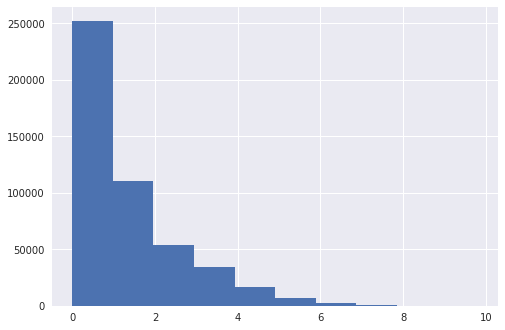

In [49]:
import numpy as np
df['count(rating)']=np.log(df['count(rating)'])
plt.hist(df['count(rating)'])

In [41]:
df.head()

itemid  count(rating)
0  B0048NVVZS              1
1  B00FN99AZ4              2
2  B00594ZUB6              1
3  B000NDLJOU             16
4  B0013ENCCA              2

In [111]:
#################e##########
py.sign_in('AdityaRoyalMatturi', 'zMVu0vZEqfMLeMEXdltw')
data5 = go.Bar(
          x=df['category'],
          y=df['rating'])
layout = go.Layout(
    title='mean_rating for each category',
    xaxis=dict(
        title='itemid'),
    yaxis=dict(
        title='count_Rating')
)
data=[data5]
fig = dict(data=data,layout=layout)
py.iplot(fig,filename='e.csv')

In [115]:
####################d########
py.sign_in('AdityaRoyalMatturi', 'zMVu0vZEqfMLeMEXdltw')
data5 = go.Pie(
  labels=[1,2,3,4,5],values=[456322,4347541,901765,1485781,633073])

data=[data5]
fig = dict(data=data)
py.plot(fig,filename='d.csv')


u'https://plot.ly/~AdityaRoyalMatturi/106'

In [ ]:
#########################b
data5 = go.Histogram(
          x=df['itemid'])
layout = go.Layout(
    title='Distribution of counts',
    xaxis=dict(
        title='Item_id'))
data=[data5]
fig = dict(data=data,layout=layout)
py.plot(fig,filename='b.csv')







In [ ]:
data5 = go.Bar(
          x=df['userid'],
          y=df['count(rating)'])
layout = go.Layout(
    title='No of ratings for each users',
    xaxis=dict(
        title='User_Id'),
    yaxis=dict(
        title='Rating_count')
)

In [116]:
data=[data5]
fig = dict(data=data,layout=layout)
py.iplot(fig,filename='a.csv')

In [18]:
!pip install numpy
import numpy as np
np.unique(k['year'])

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


array(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014'], dtype=object)

In [97]:
len(popular_prod)

10

In [122]:
rules

[]

In [123]:
i

20